In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset
import matplotlib.pyplot as plt
pd.set_option(
    "display.max_colwidth", None
)

In [3]:
pip install PyPDF2 pdfplumber datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 86.1 MB/s eta 0:00:00


In [5]:
import os
import pdfplumber
from datasets import Dataset
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text
pdf_directory = "/content/sample_data/files"
data = []
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, filename)
        text = extract_text_from_pdf(pdf_path)
        data.append({"filename": filename, "text": text})
ds = Dataset.from_list(data)
print(ds)

Dataset({
    features: ['filename', 'text'],
    num_rows: 5
})


In [6]:
for i in range(len(ds)):
    print(f"Filename: {ds[i]['filename']}")
    print(f"Text: {ds[i]['text']}\n")

Filename: Pendency and Vacancies in the Judiciary.pdf
Text: Pendency and Vacancies in the Judiciary
The Indian judiciary faces an increasing number of cases to be decided, and a large number of
vacancies across all levels. The
Supreme Court Collegium recently recommended the appointment of 129 High Court judges, soon
after the appointment of seven
judges to the Supreme Court. In this note, we present data related to pendency of cases and
vacancies of judges at various levels
of the judiciary.
Pendency of cases rising across courts; over four and a half crore cases pending at present
Pendency and Vacancies in the Judiciary
The Indian judiciary faces an increasing number of cases to be decided, and a large number of
vacancies across all levels. The
Supreme Court Collegium recently recommended the appointment of 129 High Court judges, soon
after the appointment of seven
judges to the Supreme Court. In this note, we present data related to pendency of cases and
vacancies of judges at vario

In [7]:
pip install langchain

In [8]:
pip install tqdm

In [9]:
from langchain.docstore.document import Document as LangchainDocument
from tqdm.notebook import tqdm
RAW_KNOWLEDGE_BASE = [
    LangchainDocument(page_content=doc["text"])
    for doc in tqdm(ds)
]

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
print(RAW_KNOWLEDGE_BASE)

[Document(metadata={}, page_content='Pendency and Vacancies in the Judiciary\nThe Indian judiciary faces an increasing number of cases to be decided, and a large number of\nvacancies across all levels. The\nSupreme Court Collegium recently recommended the appointment of 129 High Court judges, soon\nafter the appointment of seven\njudges to the Supreme Court. In this note, we present data related to pendency of cases and\nvacancies of judges at various levels\nof the judiciary.\nPendency of cases rising across courts; over four and a half crore cases pending at present\nPendency and Vacancies in the Judiciary\nThe Indian judiciary faces an increasing number of cases to be decided, and a large number of\nvacancies across all levels. The\nSupreme Court Collegium recently recommended the appointment of 129 High Court judges, soon\nafter the appointment of seven\njudges to the Supreme Court. In this note, we present data related to pendency of cases and\nvacancies of judges at various level

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
MARKDOWN_SEPARATORS = [
    "\n#{1,6}",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n\\*\\*\\*\n",
    "\n\\*\\*\n",
    "\n\\*\n",
    "\n",
    ".",
    "",
]
text_splitter = RecursiveCharacterTextSplitter(
    separators=MARKDOWN_SEPARATORS,
    chunk_size=512,
    chunk_overlap=200,
    add_start_index=True,
    strip_whitespace=True
)
docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
  docs_processed += text_splitter.split_documents([doc])

In [12]:
print(len(docs_processed))

71


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

  0%|          | 0/71 [00:00<?, ?it/s]

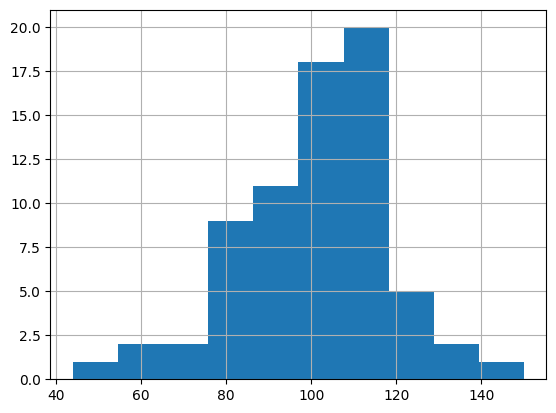

In [13]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig = pd.Series(lengths).hist()
plt.show()

100%|██████████| 17/17 [00:00<00:00, 1028.88it/s]


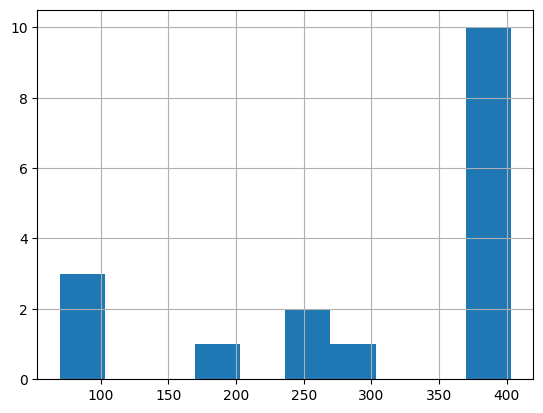

In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoModel, AutoTokenizer
from typing import Optional, List
from langchain.docstore.document import Document as LangchainDocument
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
EMBEDDING_MODEL_NAME = "thenlper/gte-small"
def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument] :
  """
  Split documents into chunks of maximum size `chunk_size` tokens and return a list of documents.
  """
  text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
      AutoTokenizer.from_pretrained(tokenizer_name),
      chunk_size=chunk_size,
      chunk_overlap=int(chunk_size / 10),
      add_start_index = True,
      strip_whitespace=True,
      separators=MARKDOWN_SEPARATORS
  )
  docs_processed = []
  for doc in knowledge_base:
    docs_processed += text_splitter.split_documents([doc])
  unique_texts = {}
  docs_processed_unique = []
  for doc in docs_processed:
    if doc.page_content not in unique_texts:
      unique_texts[doc.page_content] = True
      docs_processed_unique.append(doc)
  return docs_processed_unique
docs_processed = split_documents(512, RAW_KNOWLEDGE_BASE, tokenizer_name=EMBEDDING_MODEL_NAME,)
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig = pd.Series(lengths).hist()
plt.show()

In [15]:
pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [16]:
pip install sentence_transformers

In [17]:
pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.3 MB/s eta 0:00:00


In [18]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    # model.kwargs={"device": "cuda:1"},
    encode_kwargs={"normalize_embeddings": True},
)
KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE
)

<ipython-input-18-7682225041f2>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
torch.random.manual_seed(0)
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)
generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

config.json:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
prompt_chat = [
    {
        "role": "system",
        "content": """Using the information contained in the context, Give a comprehensive answer to the question. Respond only to the question asked, response should be concise and relevant to the question. provide the number of the source document when relevant. If the answer cannot be deduced from the context, do not give an answer""",
    },
    {
        "role": "user",
        "content": """Context:
        {context}
        ---
        Now here is the Question you need to answer.
        Question:{question}""",
    },
]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_chat, tokenize=False, add_generation_prompt=True,
)
print(RAG_PROMPT_TEMPLATE)

In [ ]:
u_query = "Give me the steps for paying traffic fines a case"
retrieved_docs_with_scores = KNOWLEDGE_VECTOR_DATABASE.similarity_search_with_score(query=u_query, k=3)
print("=======================================\n")
for i in retrieved_docs_with_scores:
  print(i)
  print()
print("=======================================\n")
retrieved_docs = [doc for doc, score in retrieved_docs_with_scores]
similarity_scores = [score for doc, score in retrieved_docs_with_scores]
print("\nSimilarity scores of the retrieved documents:", similarity_scores)
threshold_lower = 0.155
threshold_upper = 0.349
score_within_range = any(threshold_lower <= score <= threshold_upper for score in similarity_scores)
if score_within_range:
  context = retrieved_docs[0].page_content
  final_prompt = RAG_PROMPT_TEMPLATE.format(
      question=u_query, context=context
  )
  output = pipe(final_prompt, max_new_tokens=500, return_full_text=False, temperature=0.0, do_sample=False)
  print("\nAnswer found within the specified score range:")
  print("YOUR QUESTION:\n", u_query, "\n")
  print("MICROSOFT 128K ANSWER:\n", output[0]['generated_text'])
else:
  print("\nYour question is not found in the dataset.")

In [ ]:
pip install fastapi

In [ ]:
pip install pyngrok

In [ ]:
!pip install uvicorn
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from pyngrok import ngrok
import uvicorn
import nest_asyncio
app = FastAPI()
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"]
)
class QueryModel(BaseModel):
  query: str
THRESHOLD_LOWER = 0.112
THRESHOLD_UPPER = 0.349
@app.post("/query")
async def query_api(request: QueryModel):
  u_query = request.query
  retrieved_docs_with_scores = KNOWLEDGE_VECTOR_DATABASE.similarity_search_with_score(query=u_query, k=3)
  retrieved_docs = [doc for doc, score in retrieved_docs_with_scores]
  similarity_scores = [score for doc, score in retrieved_docs_with_scores]
  score_within_range = any(THRESHOLD_LOWER <= score <= THRESHOLD_UPPER for score in similarity_scores)
  if score_within_range:
    context = retrieved_docs[0].page_content
    final_prompt = RAG_PROMPT_TEMPLATE.format(
        question=u_query, context=context
    )
    output = pipe(final_prompt, max_new_tokens=500, return_full_text=False, temperature=0.0, do_sample=False)
    return {"question": u_query, "answer": output[0]['generated_text']}
  else:
    return {"question": u_query, "answer": "Your question is not found in the dataset."}

In [ ]:
!ngrok config add-authtoken 2pUNgJIQWTLqhimExQEP80xVwUi_2sW3XC2LbJWpNkpMHBjgq

In [ ]:
!pkill -f ngrok
import nest_asyncio
from pyngrok import ngrok
import uvicorn
if __name__ == "__main__":
    nest_asyncio.apply()
    ngrok.set_auth_token("2pUNgJIQWTLqhimExQEP80xVwUi_2sW3XC2LbJWpNkpMHBjgq")
    public_url = ngrok.connect(8000)
    print("ngrok tunnel 'public_url':", public_url.public_url)
    uvicorn.run(app, host="0.0.0.0", port=8000)